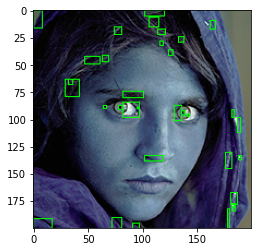

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Import Image
image = cv2.imread('Graphics/face.png')

# cv2.resize(image, (0, 0), fx=0.1, fy=0.1)
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 250)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to hold the bounding boxes that pass our filter criteria
bounding_boxes = []

# Iterate over the contours
for cnt in contours:
    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(cnt)
    
    # Compute the area of the bounding box
    area = w * h
    
    # Set a minimum area threshold to filter out large bounding boxes
    if area < 225:
        # Add the bounding box coordinates to our list
        bounding_boxes.append((x, y, w, h))

# Draw the filtered bounding boxes on the original image
for bbox in bounding_boxes:
    x, y, w, h = bbox
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(image)

# Add dilation to remove unwanted elements